# Introduction to Probabilistic Programming

-----

In this notebook, we introduce probabilistic programming. In this paradigm, variables take random values that allow us to explore the uncertainty in determining the best fit model parameters. We use the [PyMC3][p3] library to sample the model parameters under the data.

-----

[p3]: http://docs.pymc.io/notebooks/getting_started.html

[1]: https://github.com/ericmjl/bayesian-analysis-recipes/blob/master/poisson-regression.ipynb
[2]: https://gist.github.com/AustinRochford/d83ecc6acd17a632a2b9df788386540b

## Table of Contents

[Model Data](#Model-Data)

[Model Fitting](#Model-Fitting)

- [Trace Plots](#Trace-Plots)

-----

Before proceeding with the rest of this notebook, we first include the notebook setup code.

-----

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# These two lines suppress warnings that sometimes
# occur when making visualizations
import warnings
warnings.filterwarnings('ignore')

# Set global figure properties
import matplotlib as mpl
mpl.rcParams.update({'axes.titlesize' : 20,
                     'axes.labelsize' : 18,
                     'legend.fontsize': 16})

# Set default Seaborn plotting style
sns.set_style('white')

-----

[[Back to TOC]](#Table-of-Contents)

## Model Data

To demonstrate model fitting via probabilistic programming, we need a suitable data set. Generally, the data will come from an experiment or other collection mechanism. In this case, however, we simply generate a random sample of data from a normal distribution. Varying the model parameters changes the distribution and provides different challenges. After creating these data, we first visualize the distribution with the theoretical mean and one standard deviation indicated, before presenting the distribution with both the empirical and theoretical mean and one standard deviations indicated.


-----



In [2]:
# Define random state for reproducability
rng = np.random.RandomState(23)

# Generate normal data
mu = 0.0
sigma = 1.0
size = 1000
data = rng.normal(mu, sigma, size)

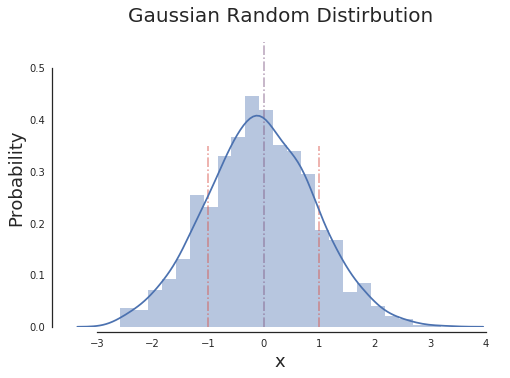

In [3]:
clrs = [sns.xkcd_rgb['pale red'], 
        sns.xkcd_rgb['dusty purple'], 
        sns.xkcd_rgb['pale red']]

#Plot data distribution
ax = sns.distplot(data)

# Plot statistics
ax.vlines([mu - sigma, mu, mu + sigma], 0.0, [0.35, 0.55, 0.35], linestyle='-.',
         colors=clrs, alpha=0.5)

# Decorate plot
ax.set(title='Gaussian Random Distirbution',
      xlabel='x', ylabel='Probability')

sns.despine(offset = 5, trim=True)

In [4]:
# Compute and display empirical statistics
mn = np.mean(data)
std = np.std(data)
print(f'Mean = {mn:4.3f}')
print(f'Std  = {std:4.3f}')

Mean = -0.061
Std  = 0.962


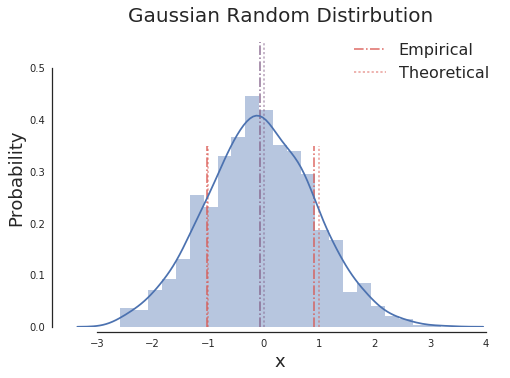

In [5]:
#Plot data distribution
ax = sns.distplot(data)

# Show statistics
ax.vlines([mn - std, mn, mn + std], 0.0, [0.35, 0.55, 0.35], linestyle='-.',
         colors=clrs, alpha=0.75, label='Empirical')
ax.vlines([mu - sigma, mu, mu + sigma], 0.0, [0.35, 0.55, 0.35], linestyle=':',
         colors=clrs, alpha=0.5, label='Theoretical')

# Decorate plot
ax.set(title='Gaussian Random Distirbution',
      xlabel='x', ylabel='Probability')

ax.legend(loc=1)
sns.despine(offset = 5, trim=True)

-----

[[Back to TOC]](#Table-of-Contents)

## Model Fitting

Given these data, we can use probabilistic programming to determine the best fit model. For simplicity, we choose a __Normal__ model, although this could be a hyperparameter that must be determined from the data themselves. To do this, we import the PyMC3 library, and create a model context. Within this context we define our stochastic model parameters: mean and sigma, before defining our model, which we call the likelihood. The model parameters are given _priors_, in this case we assume the priors for both parameters are uniform distributions over some reasonable range. We sample model parameters for this model to generate our traces. Depending on the complexity of the model and the size of the data, this process can take considerable time, but the end result is both the best model parameters and the uncertainty on these parameters.

-----

In [6]:
# Use PyMC3 to sample mean and standard deviation
import pymc3 as pm

In [7]:
n_samples = 10000

with pm.Model() as model:
    
    # First, define stohastic model variables
    mean = pm.Uniform('mean', lower = -1, upper = 1)
    sigma = pm.Uniform('sigma', lower = 0, upper = 10)
   
    # Sample values (likelihood)
    likelihood = pm.Normal('likelihood', mu=mean, sd=sigma, observed=data)
    
    # Generate trace samples
    trace = pm.sample(n_samples, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -1,388.5: 100%|██████████| 200000/200000 [00:24<00:00, 8208.76it/s]
Finished [100%]: Average ELBO = -1,388.5
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
100%|██████████| 10000/10000 [00:10<00:00, 981.97it/s]


-----

### Trace Plots

We can explore the model-fitting process by examining the traces of the sampled parameters, which in this case is the mean and standard deviation for our __Normal__ model. The PyMC3 library provides a number of useful plotting functions, and we demonstrate two of them in the following Code cells. First, we use the `traceplot` function to display the trace distributions for each model parameter as well as the traces themselves. The traces should ideally show no structure (or their is likely a problem in the model definition). 

The trace distributions can be used to provide statistical estimates for the model parameters. This is demonstrated more robustly in the second Code cell, which uses the `plot_posterior` function, which displays a histogram of the trace distributions along with summary statistics for these distributions including the mean and 95% posterior density intervals (which is similar to a confidence interval in standard statistical discussions).

-----

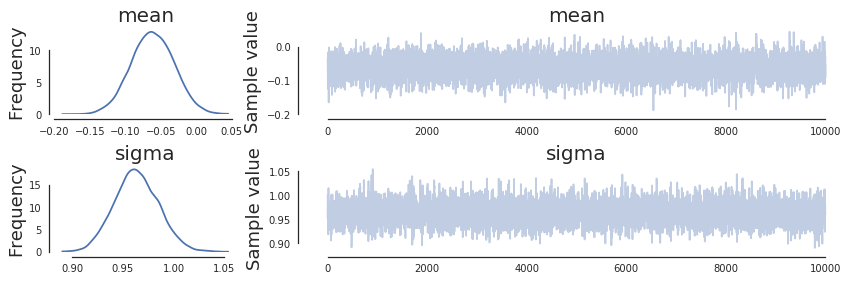

In [8]:
# Create figure layout, we want traces to consume more space than summary plots
fig, axs = plt.subplots(figsize=(12, 4), 
                        nrows=2, ncols=2, 
                        gridspec_kw = {'width_ratios':[1, 3]})
# Plot trace data
_ = pm.traceplot(trace, ax=axs)
sns.despine(offset=5, trim=True)

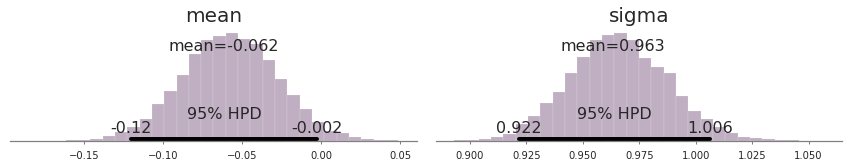

In [9]:
# Define plot special features
plt_args = {'alpha': 0.5, 'color': sns.xkcd_rgb['dusty purple']}

# plot posterior
_ = pm.plot_posterior(trace, **plt_args)

-----

<font color='red' size = '5'> Student Exercise </font>


In the preceding cells, we introduced probabilistic programming and used this approach to fit a model to data with uncertainty. Now that you have run the notebook, go back and make the following changes to see how the results change.

1. Change the sample size for the generated data to be both smaller (e.g., 100) and larger (e.g., 10,000). How does the model fit differ?
1. Change the model parameters (i.e, mean and standard deviation). How does the model fit differ?
2. Try using a different data distribution (e.g., LogNormal as opposed to Normal). How does the Normal model fit perform on the new data?
3. Try changing the model fit to match your new data distribution, does the model converge correctly?

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

12. Wikipedia article on [Probabilistic Programming][wpp] languages
3. Introduction to [Probabilistic Programming][gpp]
45. Overview of [Probabilistic Programming][ipp]
12. Discussion on [Probabilistic Programming][ppe]
3. Notebook introduction to [Probabilistic Programming][npp]
3. Chapter one on [Introducing PyMC3][bmh1] from _Bayesian Method for Hackers_ by Cam Davidson Pilon
12. PyMC3 documentation on [getting started with PyMC3][ipymc3]
13. Discussion on algorithms [behind Probabilistic Programming][ffl] along with a [demonstration of Probabilistic Programming][fflrn]
14. Chapter one [introducing Probabilistic Programming][mpp1] from _Practical Probabilistic Programming_ by Avi Pfeffer
15. Demonstration of Probabilistic Programming by calculating how to prepare for [soccer free kicks][spp]
143. Overview of [Probabilistic Programming][opp]
22. Notebook demonstration of [Probabilistic Programming][npp]
54. Overview on the differences between [frequentist and Bayesian statistical modeling][jvdp]

-----

[npp]: https://github.com/jdwittenauer/ipython-notebooks/blob/master/notebooks/misc/ProbablisticProgramming.ipynb
[gpp]: https://github.com/zipfian/probabilistic-programming-intro
[ipp]: https://github.com/fastforwardlabs/probabilistic-programming-from-scratch/blob/master/probabilistic-programming-from-scratch.ipynb

[wpp]: https://en.wikipedia.org/wiki/Probabilistic_programming_language

[aibpymc3]: http://blog.applied.ai/bayesian-inference-with-pymc3-part-1/

[bmh1]: https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Ch1_Introduction_PyMC3.ipynb

[ipymc3]: https://pymc-devs.github.io/pymc3/notebooks/getting_started.html

[jvdp]: https://jakevdp.github.io/blog/2014/06/14/frequentism-and-bayesianism-4-bayesian-in-python/

[ffl]: http://blog.fastforwardlabs.com/2017/01/30/the-algorithms-behind-probabilistic-programming.html

[fflrn]: http://fastforwardlabs.github.io/pre/#/probability/1000000-50/2016/all_boroughs/all_neighborhoods?explainer=true&_k=3dirsi

[mpp1]: https://livebook.manning.com/#!/book/practical-probabilistic-programming/chapter-1/1

[ppe]: http://www.pl-enthusiast.net/2014/09/08/probabilistic-programming/

[bps]: http://austinrochford.com/posts/2017-10-02-bayes-param-survival.html

[npp]: http://nbviewer.jupyter.org/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/misc/ProbablisticProgramming.ipynb

[opp]: https://gist.github.com/AustinRochford/d83ecc6acd17a632a2b9df788386540b

[spp]: http://www.americansocceranalysis.com/home/2017/11/6/whats-the-point-of-practicing-penalties

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode